## Task 1 – Explore Essential Information from Text Data and Preprocessing
In this dataset, you will have access to both real news and fake news. Before machine learning,
please explore the essential information from the textual data, e.g., the most commonly used
words in the collection/real news/fake news. Note that you need to call “stopword removal” and
“lemmatization” functions before calculating the word frequency.
Then, please answer the following questions:
1. What are the most commonly used words (top 100) in the collection, the most commonly
used words (top 100) in the real news and most commonly used words (top 100) in the
fake news?

In [46]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
df_fake = pd.read_csv('./data/fake.csv')
df_real = pd.read_csv('./data/true.csv')

df_fake['label'] = 'fake'
df_real['label'] = 'real'

df = pd.concat([df_fake, df_real]).reset_index(drop=True)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",real
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",real
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",real
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",real


In [48]:
def preprocess_text(text):
    
    tokens = word_tokenize(text.lower())

    return [lemma.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

In [49]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [50]:
all_tokens = [token for tokens in df['preprocessed_text'] for token in tokens]
fakedata_tokens = [token for tokens in df[df['label'] == 'fake']['preprocessed_text'] for token in tokens]
realdata_tokens = [token for tokens in df[df['label'] == 'real']['preprocessed_text'] for token in tokens]

fdist_all = FreqDist(all_tokens)
fdist_fake = FreqDist(fakedata_tokens)
fdist_real = FreqDist(realdata_tokens)

top100_fake = fdist_fake.most_common(100)
top100_real = fdist_real.most_common(100)
top100_all = fdist_all.most_common(100)

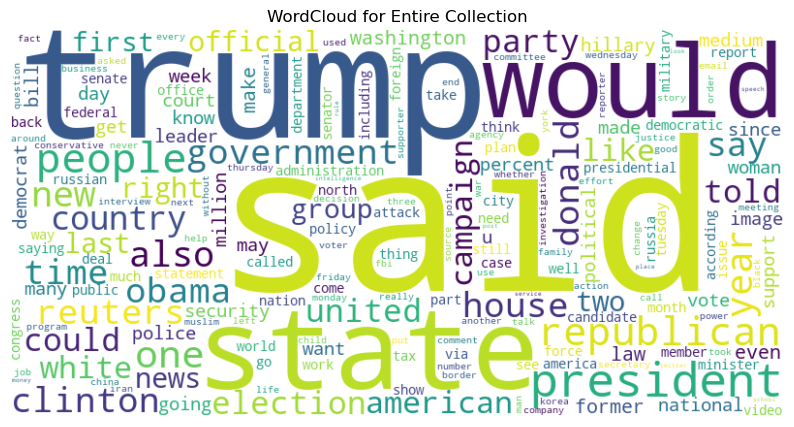

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist_all)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Entire Collection')
plt.show()


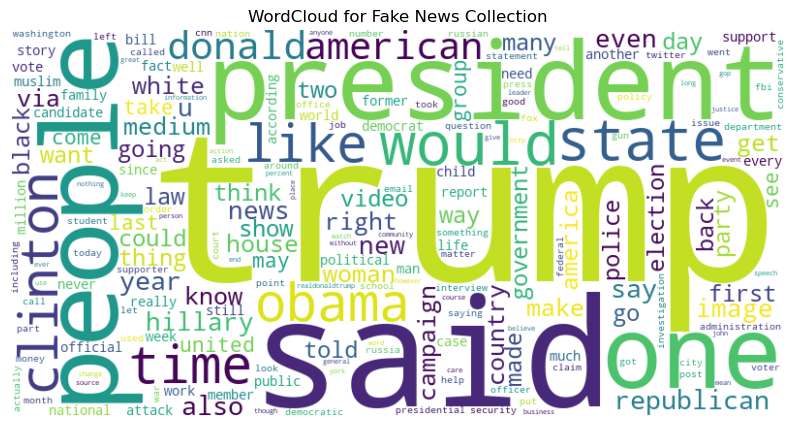

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist_fake)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Fake News Collection')
plt.show()

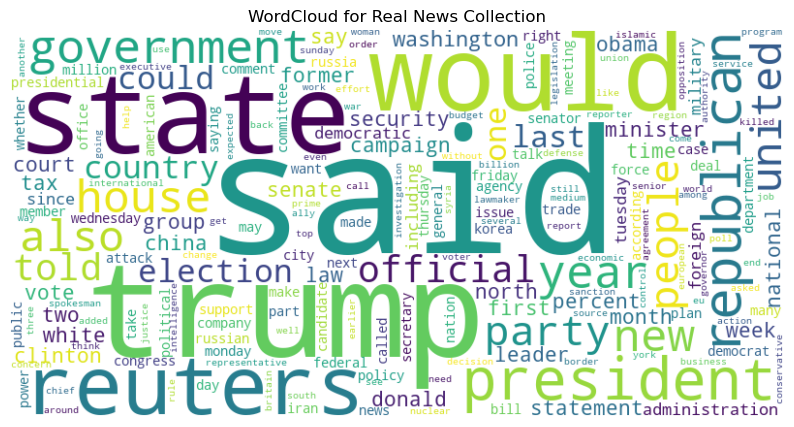

In [53]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist_real)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Real News Collection')
plt.show()

2. By reading the preprocessed textual data, can you easily tell the difference between the real news and fake news? What does the strongest feature set(for machine learning) look like?

    Ans: 
    No, we cannot directly distinguish between fake new and real news, just by visually observing the tokenized words or word clouds:
    a. After preprocessing of text data(using lemmatization, stopword removal, punctual removal), all of the remaining tokens lose out their semantic relationships. Due to which we struggle understanding the semantics and distinguish between fake and real news.
    b. Fake and real news are sharing common vocabulary(eg: politics, health, celebrities), which can now make it more difficult to differentiate

    Best features for Machine Learning:

    a. TF-IDF (highlights distinctive words)

    b. Word Embeddings (captures context and meaning)

    c. N-grams (captures phrases)
    
    d. POS-based features (noun-adjective pairs add semantic depth)


## Task 2 – Build Machine Learning Model
In this task, please build machine learning text classification models to classify all the news into "real" and "fake" categories. You will need to split the data into training and testing collections for this task (e.g., 70% and 30%). Note that you can choose different kinds of algorithms, e.g., regression and MultinomialNB, and you can feed machine learning algorithms different kinds of feature sets, e.g., "term-frequency" and "TFIDF" as the feature set. 

Please provide error analysis for the best performed results (top 2) by using “Test Confusion Matrix”. Please explain this outcome.

In [58]:
df_fake['label'] = 0
df_real['label'] = 1

df = pd.concat([df_fake, df_real]).reset_index(drop=True)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize_tf = CountVectorizer(max_features=5000)           # Term Frequency
vectorize_tfidf = TfidfVectorizer(max_features=5000)        # TF-IDF

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train_vec = vectorize_tfidf.fit_transform(X_train)
X_test_vec = vectorize_tfidf.transform(X_test)

# Using Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred_nb = nb.predict(X_test_vec)

# Using Linear Regression model
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)

In [77]:
print("Using Multinomial NB Model with TF_IDF:\n", classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

print("Using Logistic regression Model with TF-IDF:\n", classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Using Multinomial NB Model with TF_IDF:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7091
           1       0.94      0.93      0.93      6379

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470

[[6681  410]
 [ 478 5901]]
Using Logistic regression Model with TF-IDF:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7091
           1       0.98      0.99      0.98      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

[[6975  116]
 [  83 6296]]
